In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras import layers, models

You can see information about data from data_descrition.txt everything about data is written here.

In [3]:
# Load data
df = pd.read_csv('LoanExport.csv', low_memory=False)
df

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,199903,N,202902,37964,0,1,O,60,32,...,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12
291447,840,200210,N,202904,35644,0,1,O,73,0,...,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53
291448,840,200304,N,202904,42044,0,1,O,73,31,...,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38
291449,845,199904,N,202903,37964,0,1,I,80,54,...,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32


# Data Analysis

In [4]:
df.info() # info about data its dtypes and counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [5]:
df_cat = df.dtypes[df.dtypes == object] # Categorical columns of data
df_cat

FirstTimeHomebuyer    object
MSA                   object
Occupancy             object
Channel               object
PPM                   object
ProductType           object
PropertyState         object
PropertyType          object
PostalCode            object
LoanSeqNum            object
LoanPurpose           object
NumBorrowers          object
SellerName            object
ServicerName          object
dtype: object

In [6]:
df.describe() # get statistic info about data (mean, max, etc.)

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [7]:
# Label (y)
deliquentRate = df.EverDelinquent.value_counts()/len(df) * 100
df.EverDelinquent.value_counts()

EverDelinquent
0    233788
1     57663
Name: count, dtype: int64

### Visualization

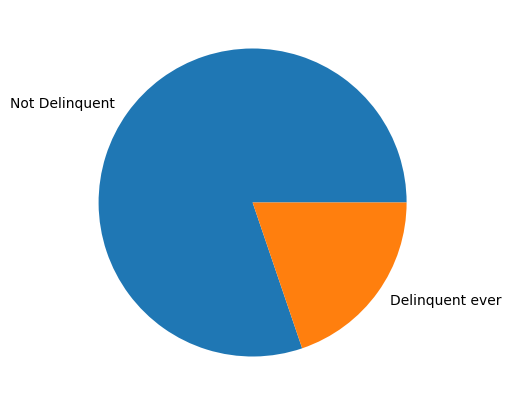

In [8]:
# Visualization
plt.figure(figsize=(5,5))
plt.pie(deliquentRate, labels=['Not Delinquent', 'Delinquent ever'])
plt.show()

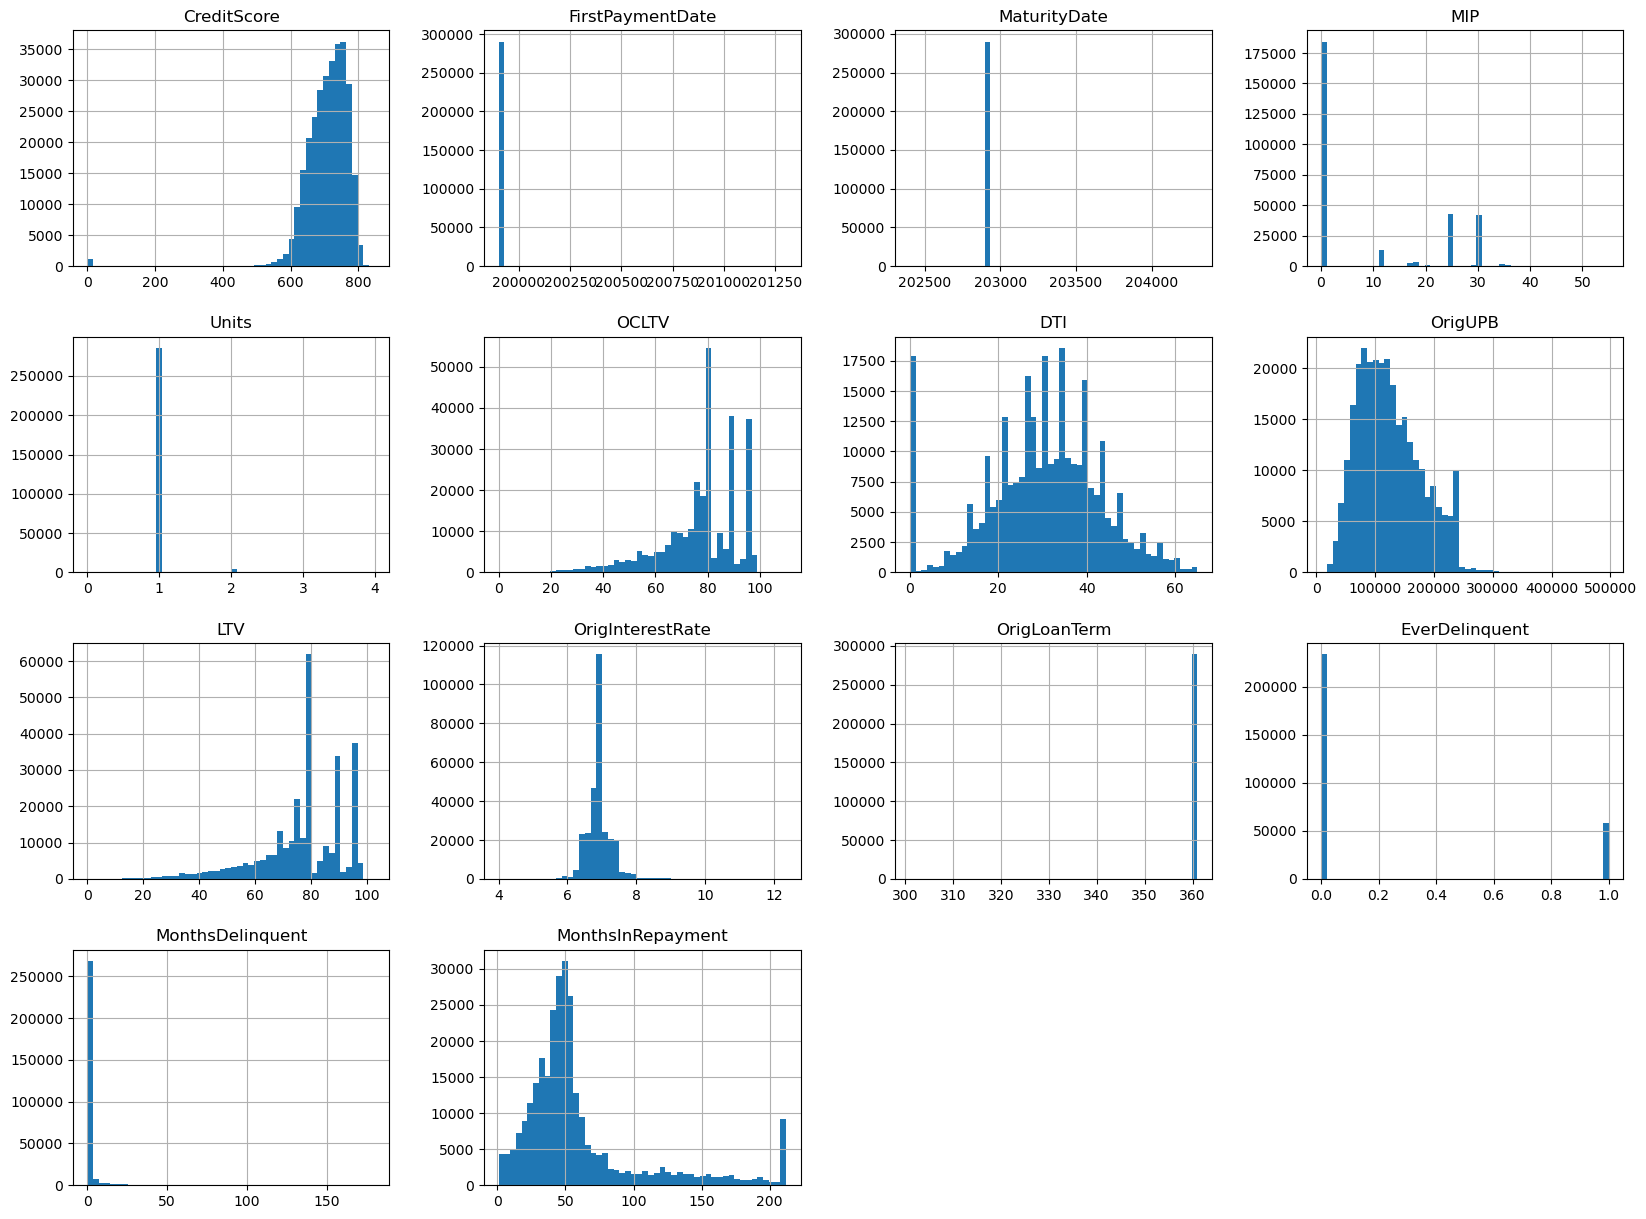

In [9]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
# bins=50: This parameter specifies the number of bins to use for each histogram.
# In this case, it sets the number of bins to 50.
# Bins are intervals into which the data is grouped.
plt.show()

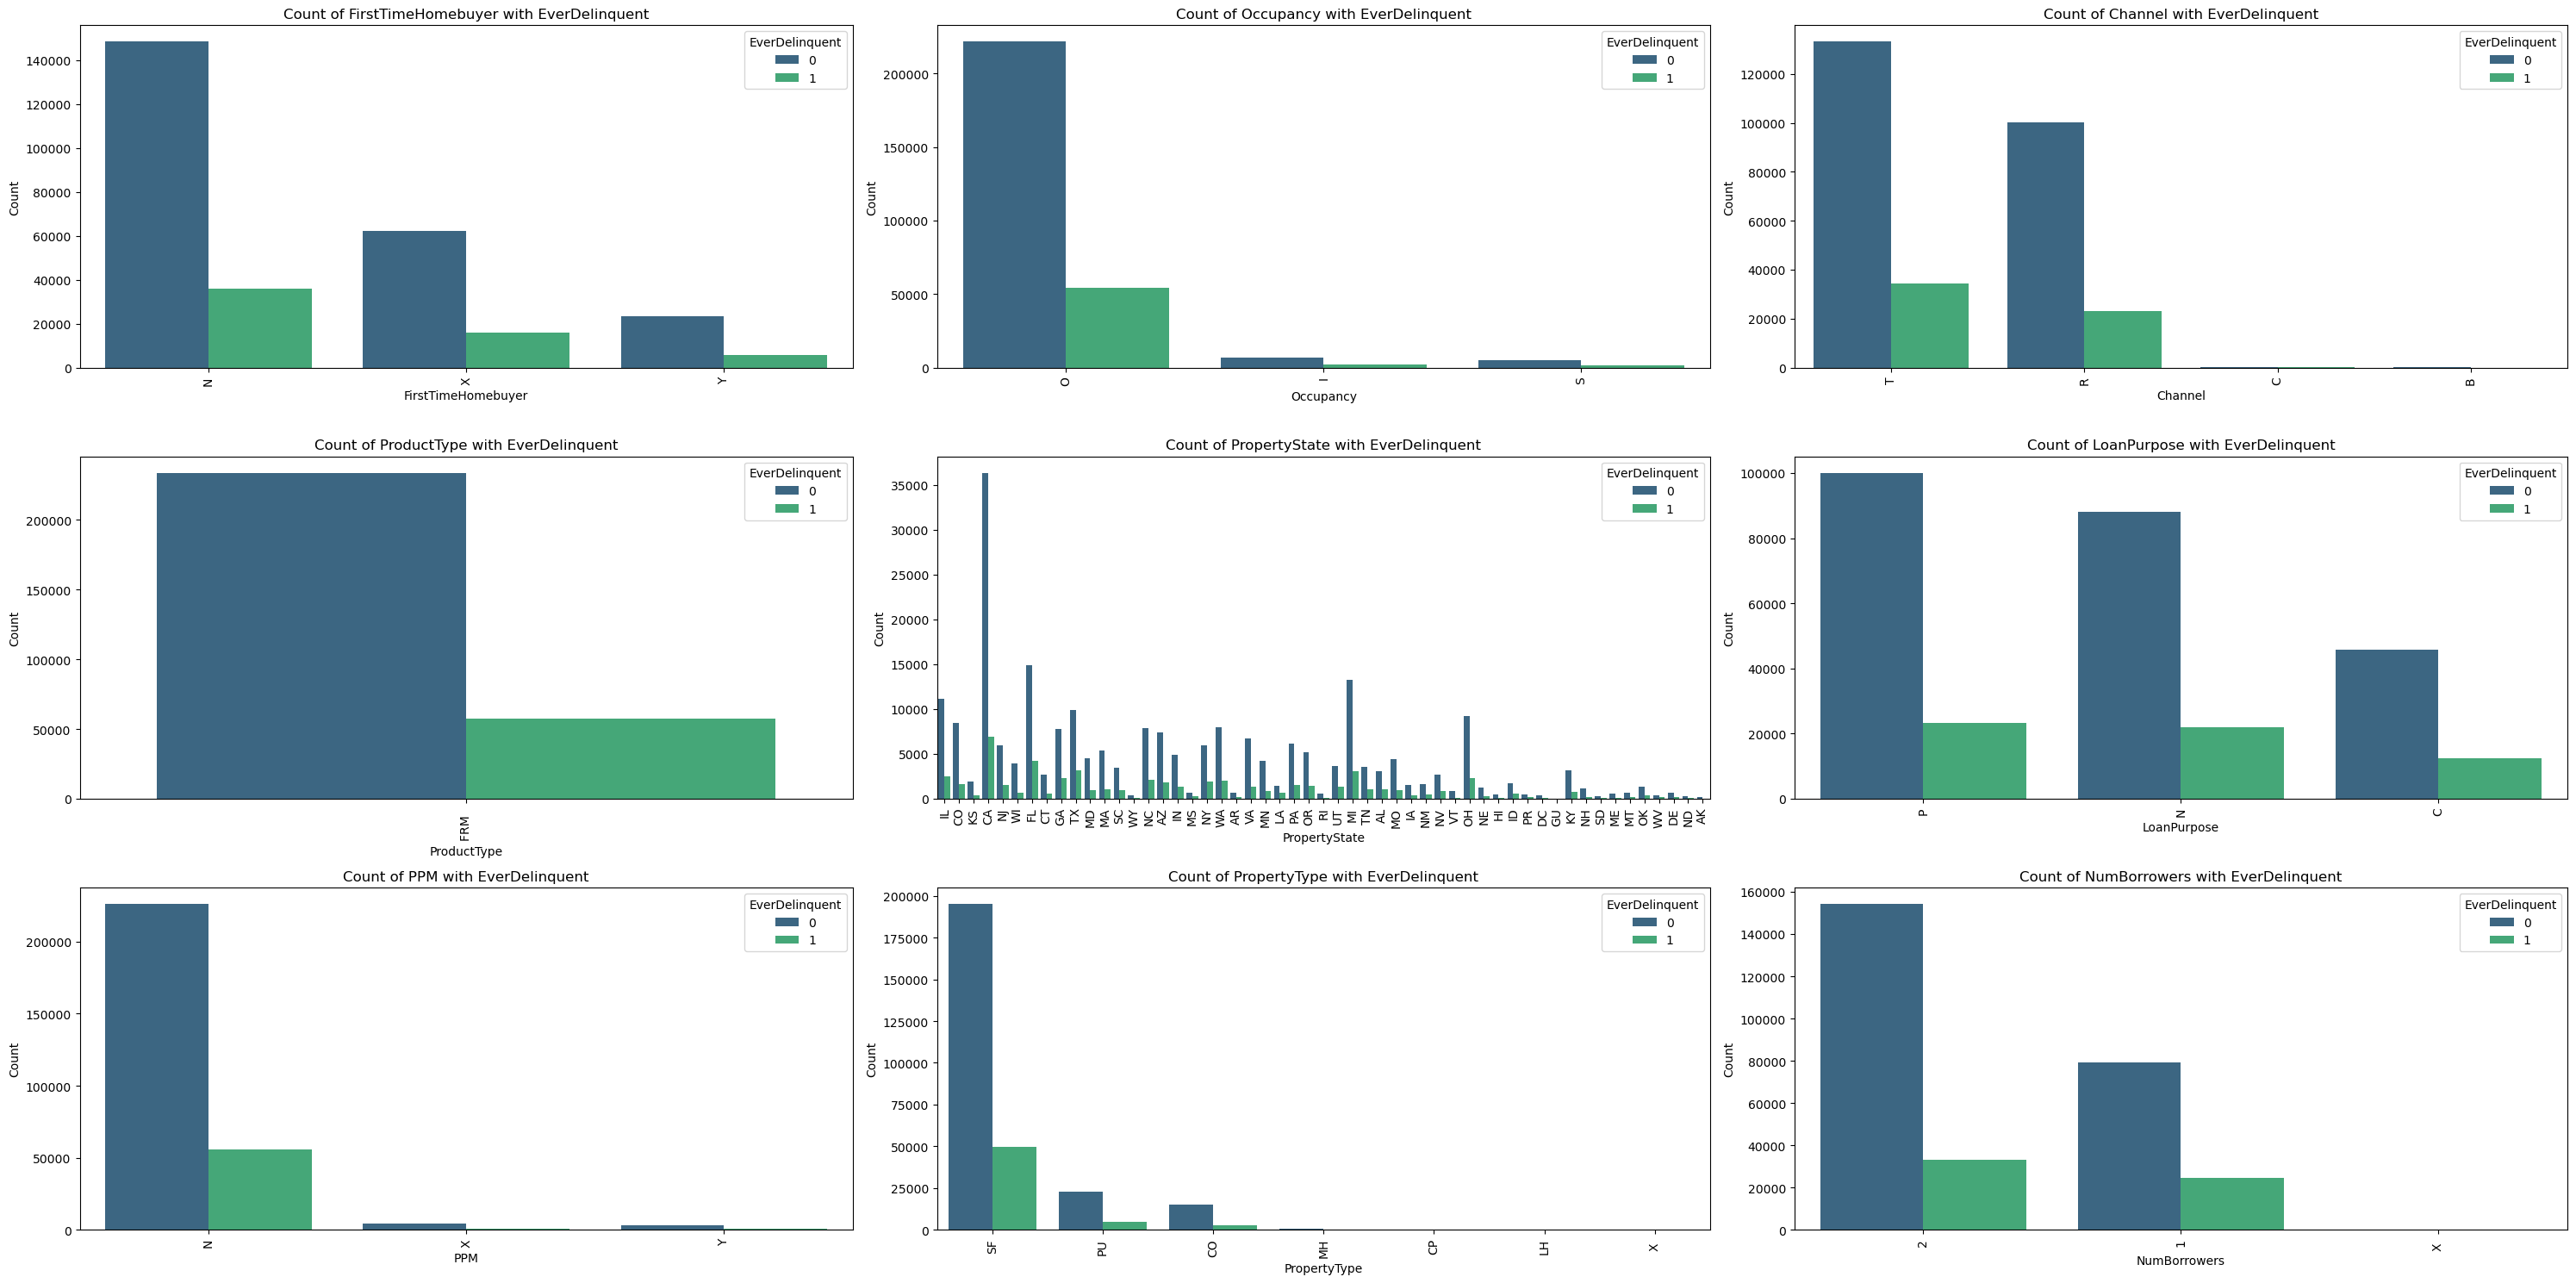

In [10]:
# Value counts of categorical cols with EverDelinquent
categorical_cols_1 = ['FirstTimeHomebuyer', 'Occupancy', 'Channel', 'ProductType', 'PropertyState', 'LoanPurpose', 'PPM', 'PropertyType', 'NumBorrowers']
fig, axes = plt.subplots(3,3, figsize=(30, 15))

# Iterate through each categorical column and plot
for i, col in enumerate(categorical_cols_1):
    if i < len(axes.flat):
        sns.countplot(data=df, x=col, hue='EverDelinquent', palette='viridis', ax=axes.flat[i])
        axes.flat[i].set_title(f'Count of {col} with EverDelinquent')
        axes.flat[i].set_xlabel(col)
        axes.flat[i].set_ylabel('Count')
        axes.flat[i].tick_params(axis='x', rotation=90)
    else:
        # If we run out of columns, remove the empty subplot
        fig.delaxes(axes.flat[i])


# Adjust layout
plt.tight_layout()
plt.show()

# Data Cleaning

In [11]:
# Check for NaN values first
df.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [12]:
# Drop unnecassary and not related columns 
columns_to_drop = ['SellerName', 'PostalCode', 'MSA','ProductType', 'LoanSeqNum']
df_dpp = df.drop(columns_to_drop, axis=1)
df_dpp

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,...,PPM,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,25,1,O,89,27,117000,...,N,IL,SF,P,360,2,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,0,1,O,73,17,109000,...,N,CO,SF,N,360,1,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,0,1,O,75,16,88000,...,N,KS,SF,N,360,2,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,0,1,O,76,14,160000,...,N,CA,SF,N,360,2,GMACMTGECORP,0,0,35
4,0,199902,N,202901,0,1,O,78,18,109000,...,N,NJ,SF,N,360,2,GMACMTGECORP,0,0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,199903,N,202902,0,1,O,60,32,90000,...,N,PA,SF,N,360,2,Other servicers,0,0,12
291447,840,200210,N,202904,0,1,O,73,0,267000,...,N,NY,SF,P,319,2,Other servicers,0,0,53
291448,840,200304,N,202904,0,1,O,73,31,87000,...,N,CA,SF,N,313,1,Other servicers,0,0,38
291449,845,199904,N,202903,0,1,I,80,54,88000,...,N,PA,SF,P,360,2,Other servicers,0,0,32


In [13]:
# There is a problem with 'X' as we can see from charts there is unnecassary 'X' in columns let's fix this problem
# Let's find out which columns have X
cat_df = df_dpp.dtypes[df_dpp.dtypes == object]
cat_df = list(cat_df.index)
for i in cat_df:
    counts = df_dpp[i].value_counts()
    print(counts[(counts.index == 'X ') | (counts.index == 'X') | (counts.index == ' X')])

FirstTimeHomebuyer
X    78015
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
PPM
X    5405
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
PropertyType
X     22
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
NumBorrowers
X     339
Name: count, dtype: int64
Series([], Name: count, dtype: int64)


In [14]:
mapping = {'FirstTimeHomeBuyer' : {'X' : np.nan}, 'PPM' : {'X': np.nan}, 'PropertyType' : {'X ' : np.nan}, 'NumBorrowers' : {'X ' : np.nan}}
df_dpp.replace(mapping, inplace=True) # replace strange values with NaN so that we can drop them

In [15]:
# Drop NaN values
data = df_dpp.dropna()

##### Correlation

In [16]:
# Encode data with Ordinal Encoder to see correlations between columns
encoder = OrdinalEncoder()
data_coded = encoder.fit_transform(data)
df2 = pd.DataFrame(data_coded, columns=data.columns)
df2.corrwith(df2.EverDelinquent).abs().sort_values(ascending=False)

EverDelinquent        1.000000
MonthsDelinquent      0.418866
CreditScore           0.257635
MonthsInRepayment     0.232285
NumBorrowers          0.072147
OrigUPB               0.070040
LTV                   0.065598
OCLTV                 0.065363
OrigInterestRate      0.063767
DTI                   0.061824
MIP                   0.058881
PropertyType          0.026778
PropertyState         0.026459
LoanPurpose           0.022193
Channel               0.022059
ServicerName          0.014270
Occupancy             0.013123
FirstPaymentDate      0.012712
PPM                   0.012075
Units                 0.010031
FirstTimeHomebuyer    0.009283
OrigLoanTerm          0.009260
MaturityDate          0.002013
dtype: float64

##### Feature adding

As we can see from data there is MaturityDate and FirstPaymentDate (these are all years) so when we substract Maturity date from FirstPaymentData we now have new feature Duration of those times this will be really helpfull to train data

In [17]:
data.loc[:, 'Duration'] = (data['MaturityDate'] // 100) - (data['FirstPaymentDate'] // 100)

C:\Users\Mirsaid\AppData\Local\Temp\ipykernel_3840\1645834215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Duration'] = (data['MaturityDate'] // 100) - (data['FirstPaymentDate'] // 100)


In [18]:
data['Duration']

0         30
1         30
2         30
3         30
4         30
          ..
291446    30
291447    27
291448    26
291449    30
291450    30
Name: Duration, Length: 285685, dtype: int64

In [19]:
data.drop(['FirstPaymentDate', 'MaturityDate'], axis=1, inplace=True) # drop 

C:\Users\Mirsaid\AppData\Local\Temp\ipykernel_3840\624179251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['FirstPaymentDate', 'MaturityDate'], axis=1, inplace=True) # drop


# Preparing Data for ML

In [20]:
# Now we have cleaned data
data

,CreditScore,FirstTimeHomebuyer,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,...,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,Duration
0,0,N,25,1,O,89,27,117000,89,6.750,...,IL,SF,P,360,2,WASHINGTONMUTUALBANK,0,0,52,30
1,0,N,0,1,O,73,17,109000,73,6.500,...,CO,SF,N,360,1,CHASEHOMEFINANCELLC,0,0,144,30
2,0,N,0,1,O,75,16,88000,75,6.875,...,KS,SF,N,360,2,WASHINGTONMUTUALBANK,0,0,67,30
3,0,N,0,1,O,76,14,160000,76,6.875,...,CA,SF,N,360,2,GMACMTGECORP,0,0,35,30
4,0,N,0,1,O,78,18,109000,78,7.125,...,NJ,SF,N,360,2,GMACMTGECORP,0,0,54,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,N,0,1,O,60,32,90000,60,7.000,...,PA,SF,N,360,2,Other servicers,0,0,12,30
291447,840,N,0,1,O,73,0,267000,73,6.375,...,NY,SF,P,319,2,Other servicers,0,0,53,27
291448,840,N,0,1,O,73,31,87000,73,5.625,...,CA,SF,N,313,1,Other servicers,0,0,38,26
291449,845,N,0,1,I,80,54,88000,80,7.000,...,PA,SF,P,360,2,Other servicers,0,0,32,30


In [21]:
# Save cleaned version of data for future uses
data.to_csv('Cleaned.csv')

In [22]:
# Train vs Test set and Pipeline
x = data.drop('EverDelinquent', axis=1)
y = data['EverDelinquent']

categorical_cols = ['FirstTimeHomebuyer', 'Occupancy', 'Channel', 'PPM', 'PropertyState', 
'PropertyType', 'LoanPurpose', 'NumBorrowers', 'ServicerName']
x_num = x.drop(categorical_cols, axis=1)
x_cat = x[categorical_cols]

In [23]:
# Pipeline
num_pipeline = Pipeline([
          ('std_scaler', StandardScaler()) # standard scaler used for normalize data between -1 and 1
])

num_pipeline.fit_transform(x_num)

num_attribs = list(x_num)
cat_attribs = categorical_cols

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OrdinalEncoder(), cat_attribs) # ordinal encoder convert categorical data to numeric data
])

In [24]:
x_prep = full_pipeline.fit_transform(x)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_prep, y, test_size=0.2, random_state=40) # 20% of data for test
x_train.shape, y_train.shape

((228548, 21), (228548,))

### ML

### Deep Learning Neural Networks

In [26]:
# Define your neural network architecture using Dense layers
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2)

Epoch 1/2


7143/7143 [==============================] - 12s 2ms/step - loss: 0.0736 - accuracy: 0.9731
Epoch 2/2
7143/7143 [==============================] - 11s 2ms/step - loss: 0.0042 - accuracy: 0.9992


In [29]:
y_hat = model.predict(x_test)
y_pred_nn = np.array([0 if y <= 0.5 else 1 for y in y_hat])

1786/1786 [==============================] - 3s 1ms/step


In [30]:
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45926
           1       1.00      1.00      1.00     11211

    accuracy                           1.00     57137
   macro avg       1.00      1.00      1.00     57137
weighted avg       1.00      1.00      1.00     57137



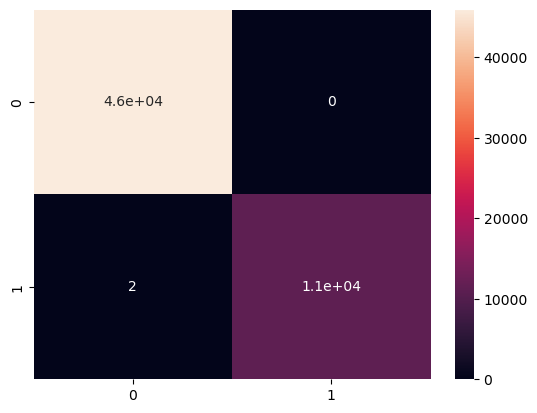

In [31]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True)
plt.show()

### Decision Tree models

In [32]:
# Create model
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
# Evaluate model
y_pred_tr = tree.predict(x_test)
print(classification_report(y_test, y_pred_tr))
print("Model accuracy: ", accuracy_score(y_test, y_pred_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45926
           1       1.00      1.00      1.00     11211

    accuracy                           1.00     57137
   macro avg       1.00      1.00      1.00     57137
weighted avg       1.00      1.00      1.00     57137

Model accuracy:  1.0


<Axes: >

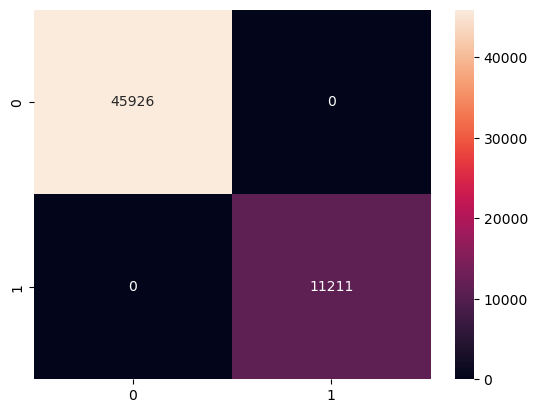

In [34]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_tr)
sns.heatmap(conf_mat, annot=True, fmt='g')

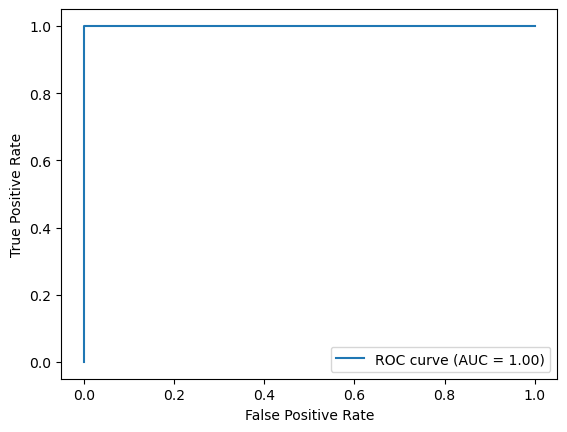

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_tr)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

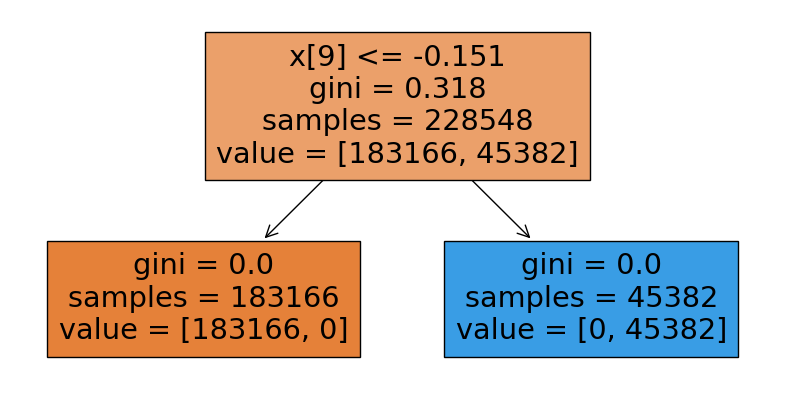

In [36]:
# Draw tree
plt.figure(figsize=(10,5))
plot_tree(tree, filled=True)
plt.show()

In [37]:
# Save train/test set for future uses
np.save('xtrain', x_train)
np.save('ytrain', y_train)
np.save('xtest', x_test)
np.save('ytest', y_test)

### RandomForest

In [38]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [39]:
# Evaluate model
y_pred_rf = rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))
print("Model accuracy: ", metrics.accuracy_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45926
           1       1.00      1.00      1.00     11211

    accuracy                           1.00     57137
   macro avg       1.00      1.00      1.00     57137
weighted avg       1.00      1.00      1.00     57137

Model accuracy:  1.0


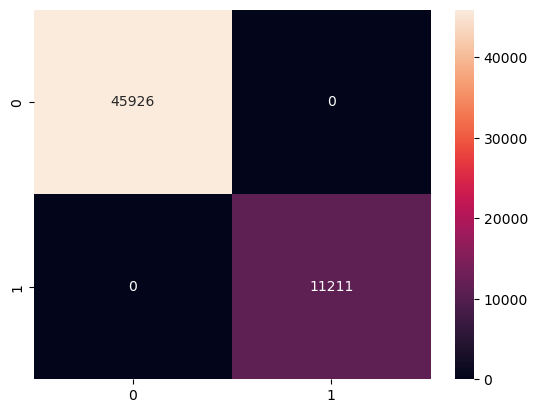

In [40]:
# confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

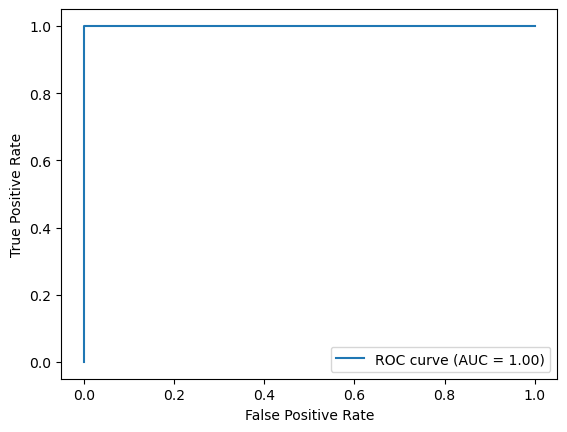

In [41]:
# Roc Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rf)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### XGBoost

In [42]:
xgboost = XGBClassifier()
# Train
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
# Evalute model
y_pred_xgb = xgboost.predict(x_test)
print(classification_report(y_test, y_pred_xgb))
print("Model accuracy: ", metrics.accuracy_score(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45926
           1       1.00      1.00      1.00     11211

    accuracy                           1.00     57137
   macro avg       1.00      1.00      1.00     57137
weighted avg       1.00      1.00      1.00     57137

Model accuracy:  1.0


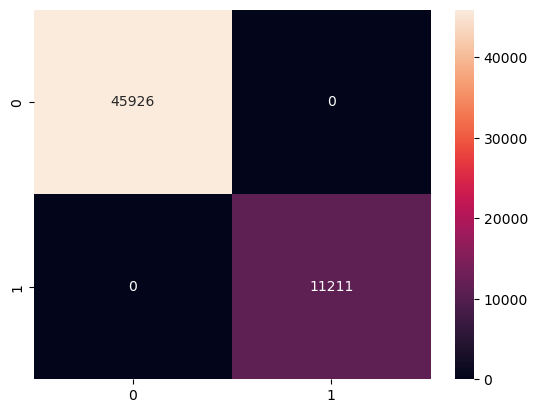

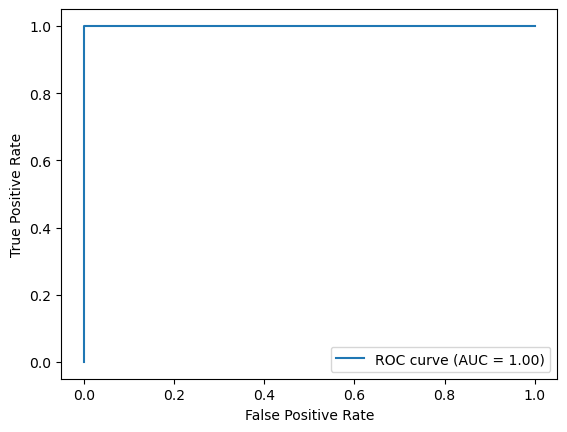

In [44]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_mat, annot=True, fmt='g')

# Roc Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_xgb)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### k-NN

In [45]:
knn = KNeighborsClassifier()

# train
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [46]:
# Predict
y_pred_knn = knn.predict(x_test)

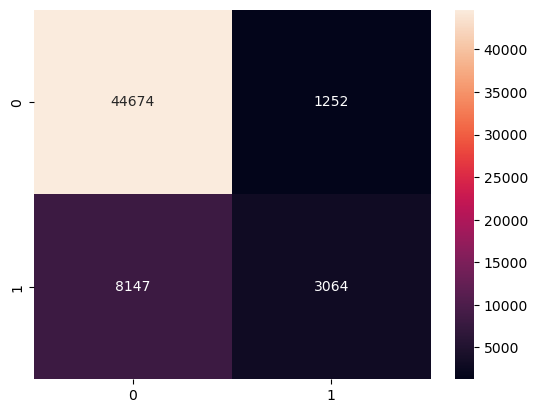

In [47]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='g')
plt.show()

In [48]:
confusion_matrix(y_test, y_pred_knn)

array([[44674,  1252],
       [ 8147,  3064]], dtype=int64)

In [49]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90     45926
           1       0.71      0.27      0.39     11211

    accuracy                           0.84     57137
   macro avg       0.78      0.62      0.65     57137
weighted avg       0.82      0.84      0.80     57137



### Comparing algorithms

In [60]:
# List of predicted labels
print('Mistakes Test:\n')
y_hats = [y_pred_nn, y_pred_tr, y_pred_rf, y_pred_xgb, y_pred_knn]
# Labels corresponding to each algorithm
labels = ['DL Neural Network', 'Decision Tree', 'Random Forest', 'XGBoost', 'k-NN']
total_mistakes = []
# Calculate total mistakes for each predicted label
for i, y_hat in enumerate(y_hats):
    conf_matrix = confusion_matrix(y_test, y_hat)
    FP = conf_matrix[0, 1]  # False Positives
    FN = conf_matrix[1, 0]  # False Negatives
    total_mistakes.append(FP + FN)
    print(f"{labels[i]}:", FP + FN)

Mistakes Test:

DL Neural Network: 2
Decision Tree: 0
Random Forest: 0
XGBoost: 0
k-NN: 9399


In [58]:
# Compare by accuracy
print("Accuracy Test:\n")

y_hats = [y_pred_nn, y_pred_tr, y_pred_rf, y_pred_xgb, y_pred_knn]
# Labels corresponding to each algorithm
labels = ['DL Neural Network', 'Decision Tree', 'Random Forest', 'XGBoost', 'k-NN']
total_mistakes = []
# Calculate total mistakes for each predicted label
for i, y_hat in enumerate(y_hats):
    acc = accuracy_score(y_test, y_hat)
    total_mistakes.append(acc)
    print(f"{labels[i]}:", acc*100)

Accuracy Test:

DL Neural Network: 99.99649964121322
Decision Tree: 100.0
Random Forest: 100.0
XGBoost: 100.0
k-NN: 83.55006388154786


In [59]:
import time
print('Time Test:\n')

models = [model, tree, rf, xgboost, knn]
# Labels corresponding to each algorithm
labels = ['DL Neural Network', 'Decision Tree', 'Random Forest', 'XGBoost', 'k-NN']

prediction_times = []

# Calculate prediction times for each predicted label
for m in models:
    start_time = time.time()
    # Make predictions
    predictions = m.predict(x_test)  # Modify this line accordingly
    end_time = time.time()
    elapsed_time = end_time - start_time
    prediction_times.append(elapsed_time)

# Print prediction times for each algorithm
print("Prediction Time Comparison:")
for i, label in enumerate(labels):
    print(f"{label}: {prediction_times[i]:.4f} seconds")

# Find the index of the algorithm with the shortest prediction time
fastest_algorithm_index = prediction_times.index(min(prediction_times))
fastest_algorithm = labels[fastest_algorithm_index]

print("\nFastest Algorithm based on Prediction Time:", fastest_algorithm)


Time Test:

1786/1786 [==============================] - 3s 1ms/step
Prediction Time Comparison:
DL Neural Network: 3.1659 seconds
Decision Tree: 0.0000 seconds
Random Forest: 0.3848 seconds
XGBoost: 0.0068 seconds
k-NN: 11.9351 seconds

Fastest Algorithm based on Prediction Time: Decision Tree


Decision Tree: The Best Algorithm for Our Data
Reasons:
High Accuracy:

The Decision Tree algorithm has shown the highest accuracy among all other algorithms tested.
Accuracy: 100%
Fast Prediction Speed: 0.000~0.0002

Decision Tree provides fast prediction times compared to other algorithms.
This is crucial for real-time applications where quick decisions are necessary.
Low Mistake Rate:

The algorithm has the lowest rate of false positives and false negatives, leading to fewer mistakes in predictions.
False Positive Rate: 0%
False Negative Rate: 0%
Interpretability and Ease of Management:

Decision Trees offer a clear, easy-to-understand decision-making process.
The model's rules are interpretable, making it easier for stakeholders to understand the predictions.
This simplicity also means it's easier to manage and maintain the model.
Conclusion:
Based on the analysis and comparison of various algorithms on our dataset, it is evident that the Decision Tree algorithm outperforms others in terms of accuracy, prediction speed, low mistake rates, and ease of management. Therefore, we recommend using the Decision Tree algorithm for future predictions and applications on our dataset.